## Horse Survival Predictions

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn as sl

In [2]:
from functions import downloadData
from functions import createResponse

path_train = r"C:\Users\Luke\MyRepo\Kaggle\Competition_1\Data\train.csv"
path_test = r"C:\Users\Luke\MyRepo\Kaggle\Competition_1\Data\test.csv"

train = downloadData(path_train)
test = downloadData(path_test)

#Set up response and training data
response = createResponse(train['outcome'])
train.drop("outcome", axis=1, inplace = True)

In [3]:
train.head(3)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no


In [4]:
test.head(3)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes


In [5]:
response

0       0
1       1
2       2
3       2
4       2
       ..
1230    2
1231    0
1232    2
1233    2
1234    2
Name: outcome, Length: 1235, dtype: int64

## Data Exploration

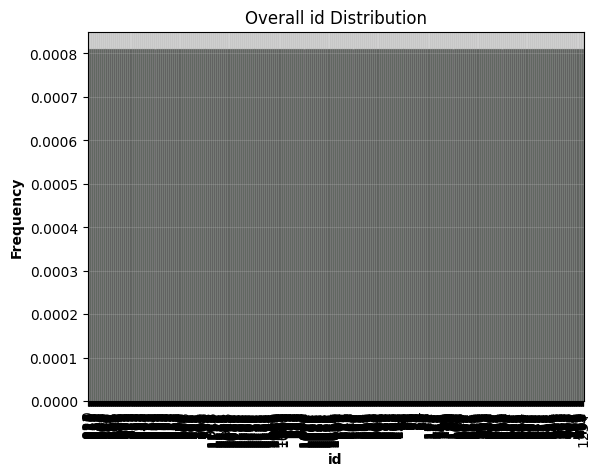

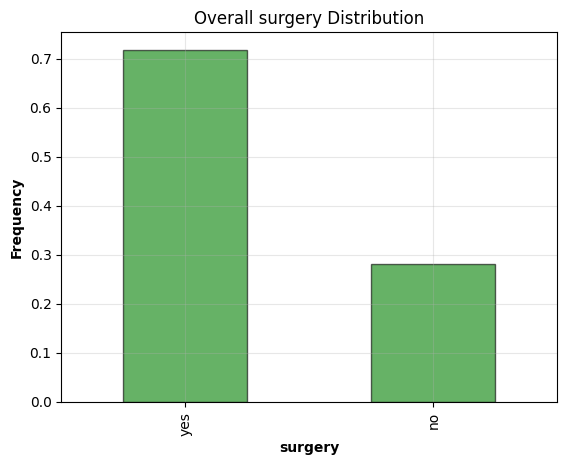

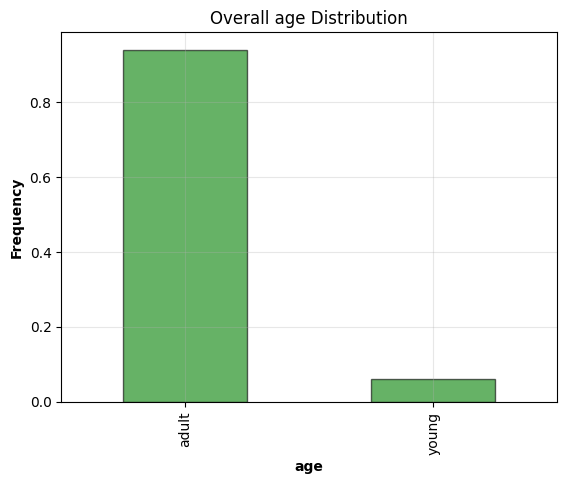

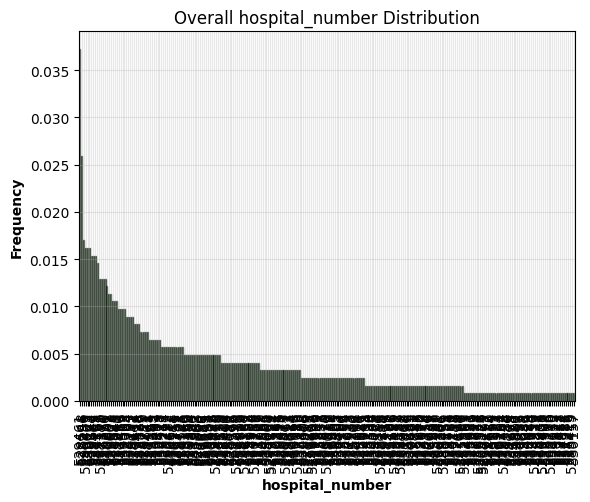

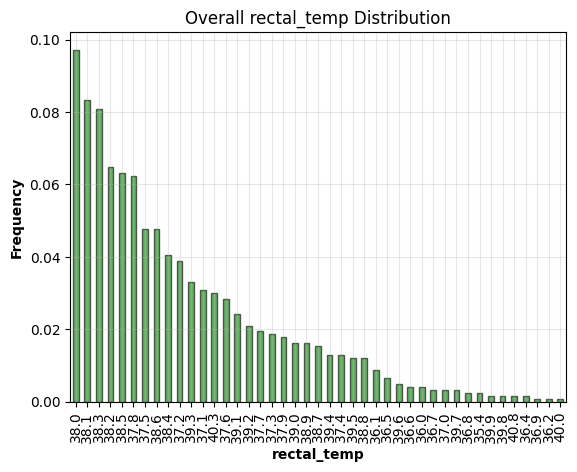

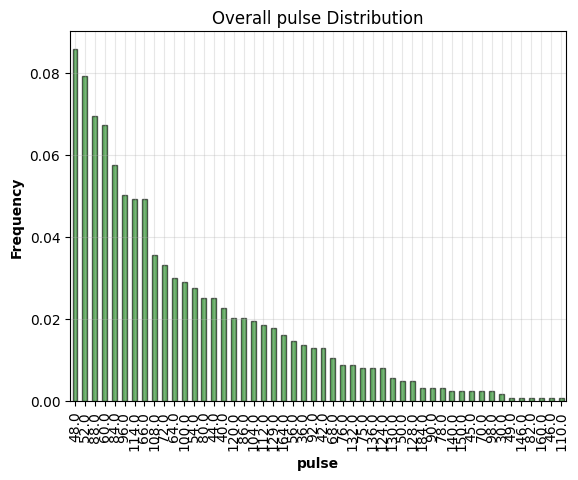

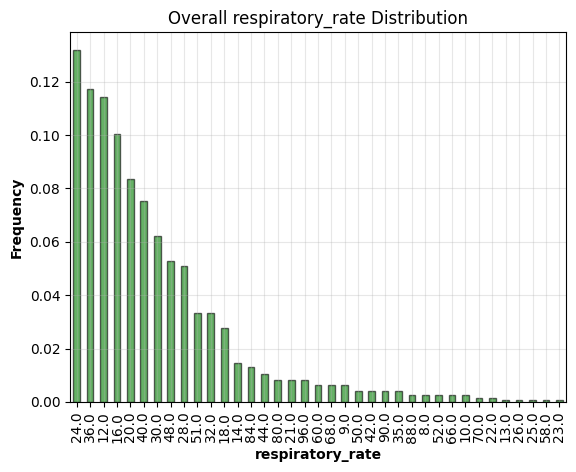

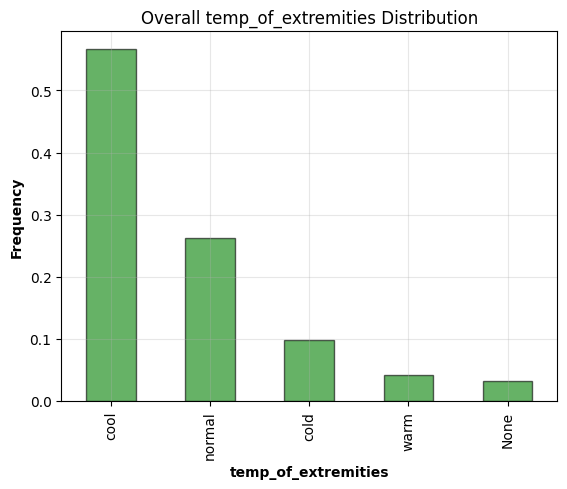

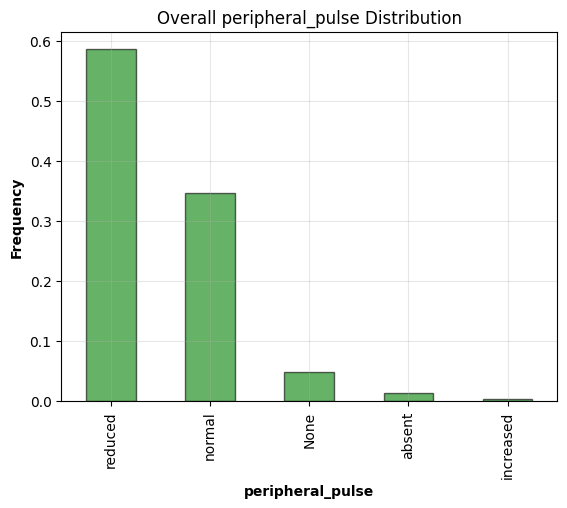

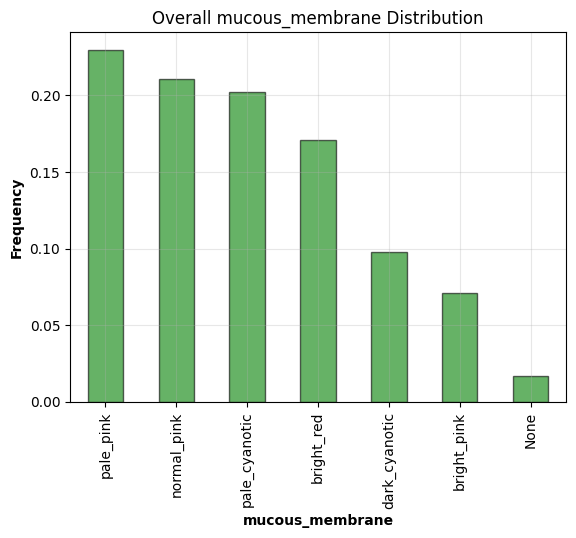

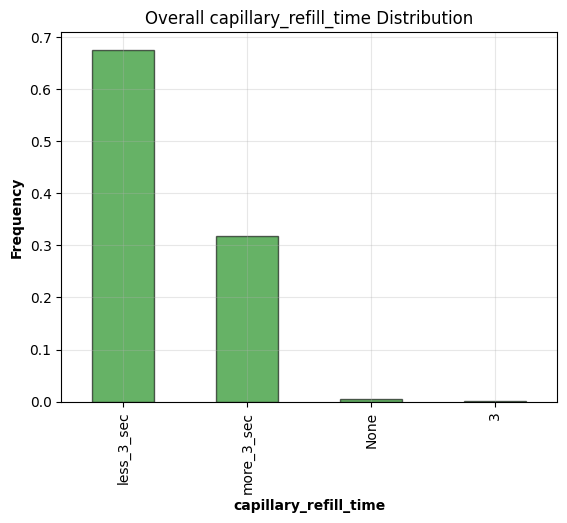

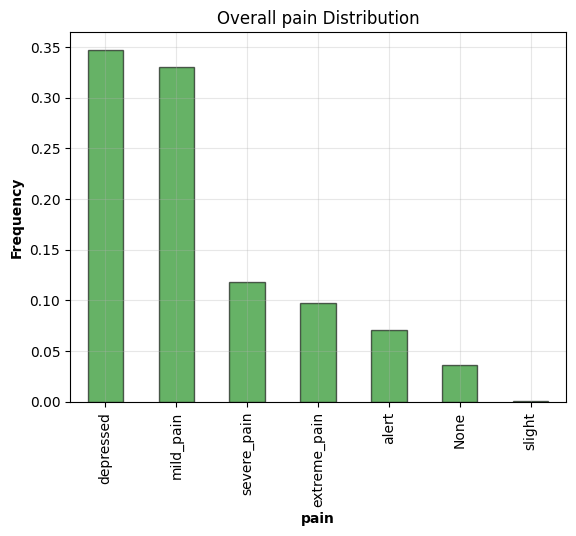

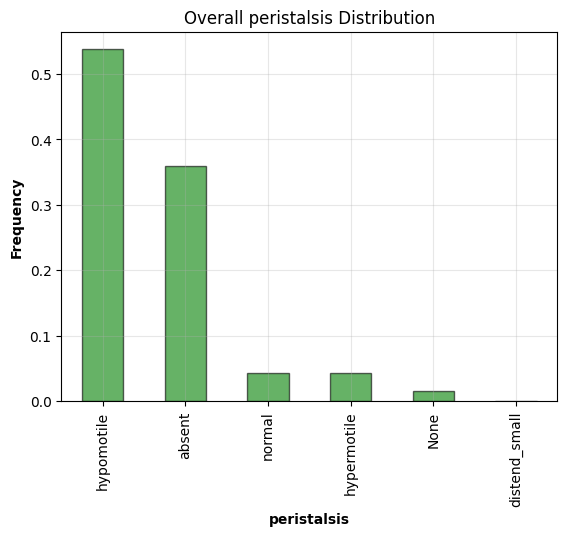

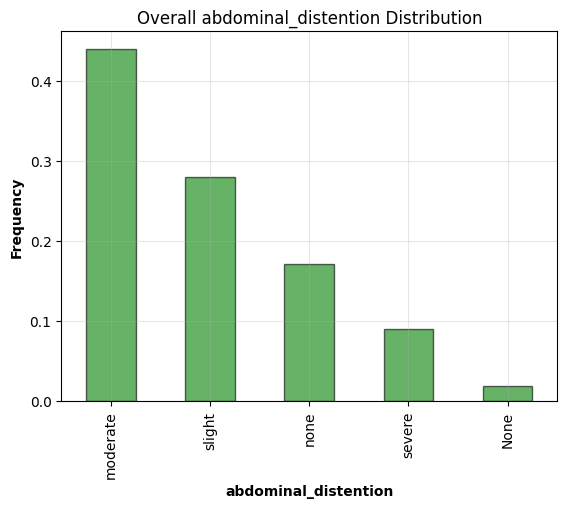

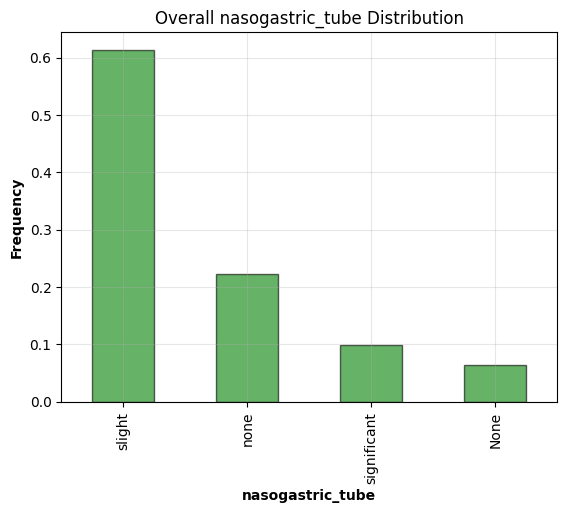

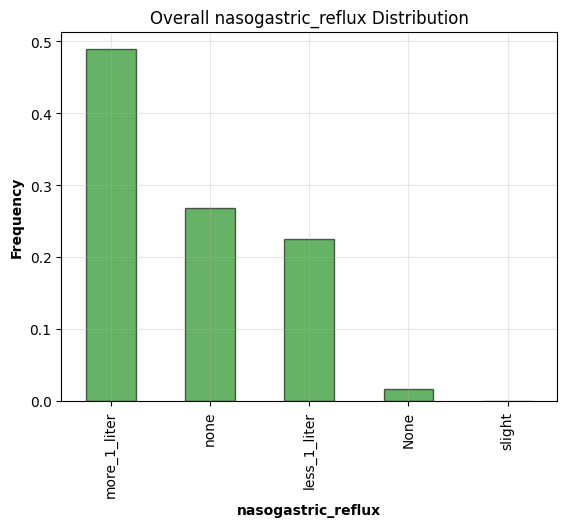

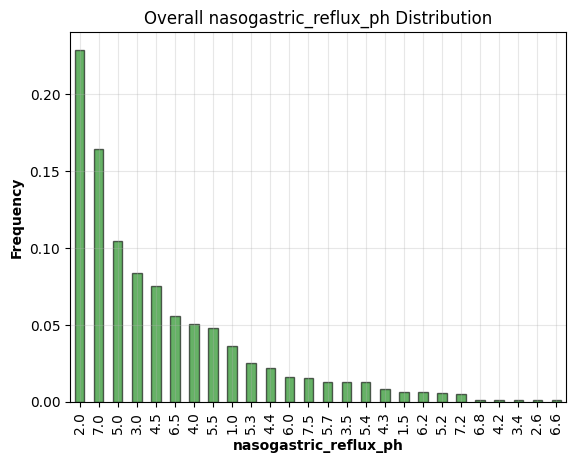

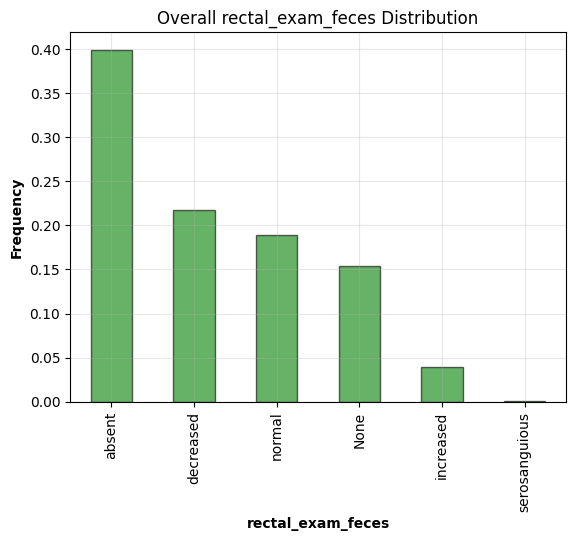

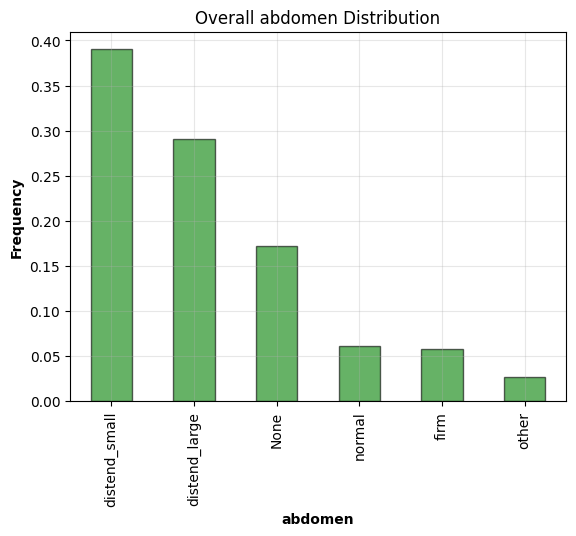

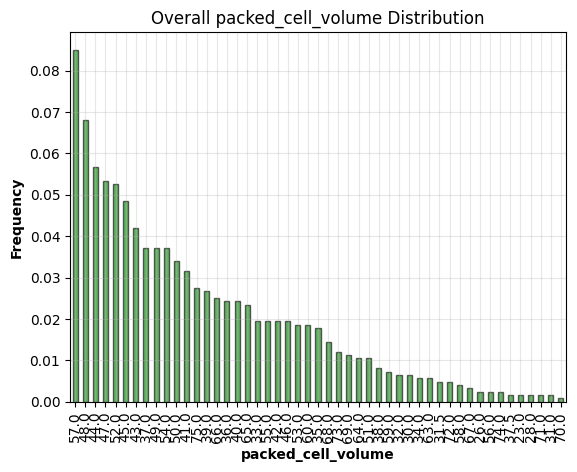

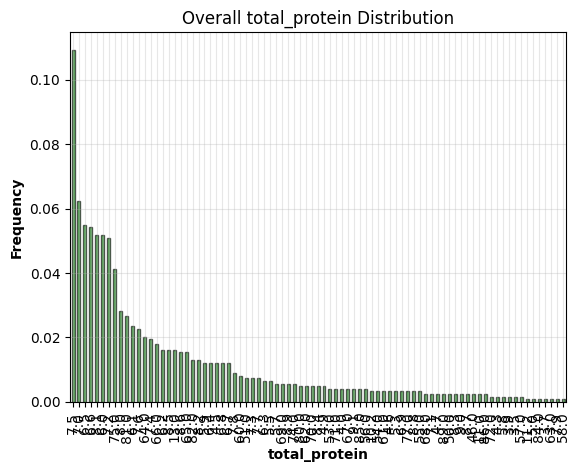

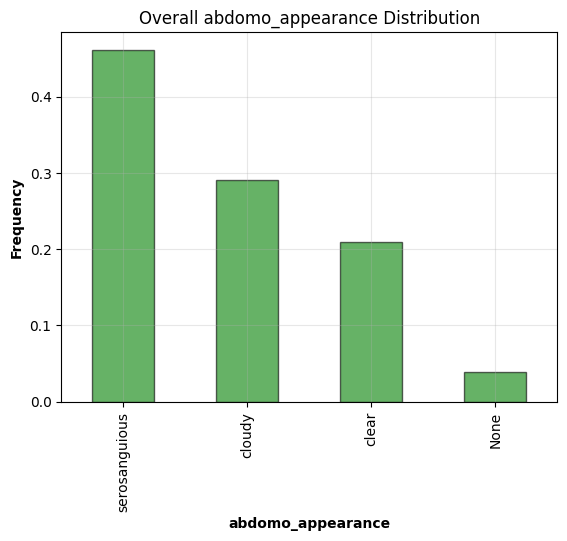

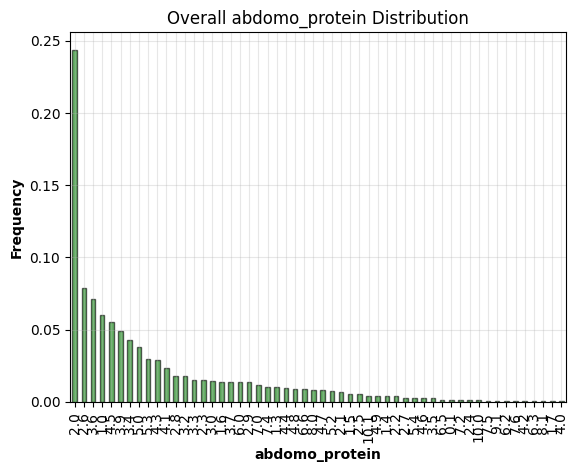

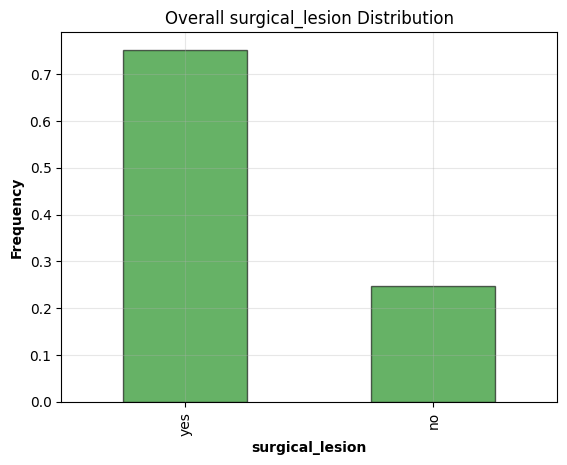

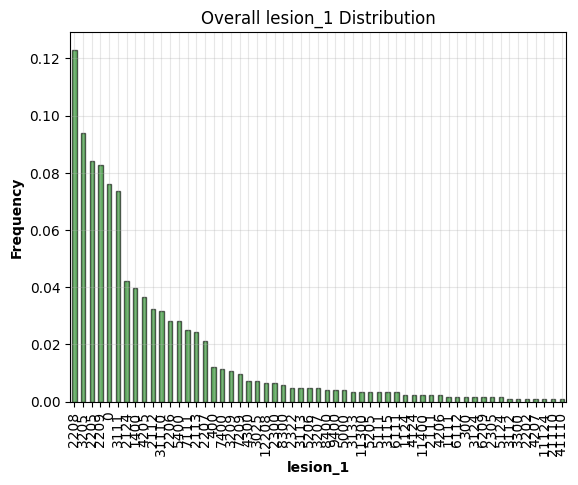

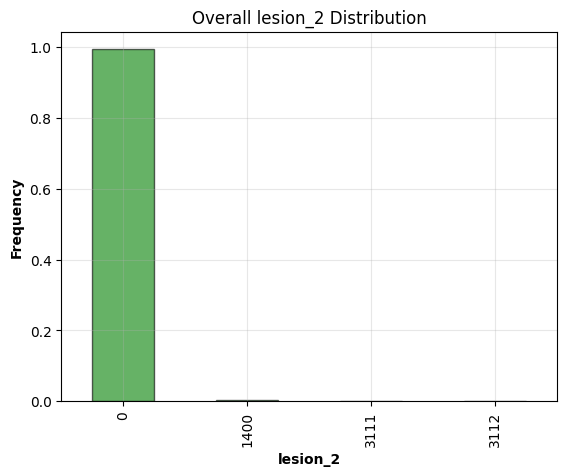

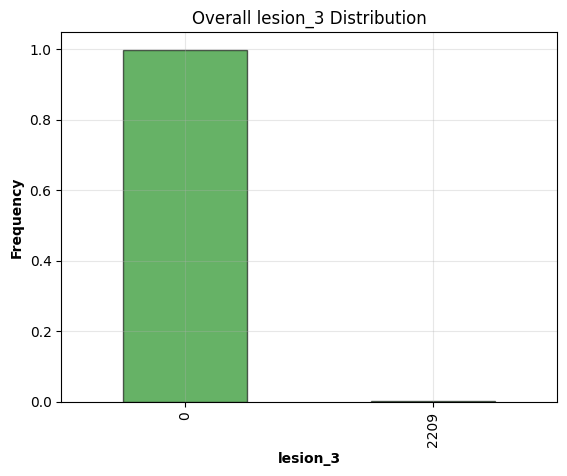

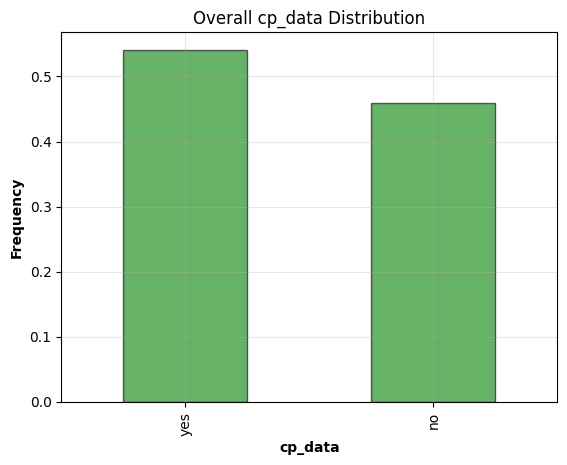

In [6]:
from functions import frequencyHistogram


for col in train.columns:
    frequencyHistogram(col, train)

In [7]:
from functions import transformData

transformed_train = transformData(train)
transformed_test = transformData(test)

In [8]:
transformed_train.head(3)

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,surgery_yes,age_young,...,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,7.700295,1,0,...,0,1,0,0,0,0,0,1,1,0
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,7.699842,1,0,...,0,1,0,0,0,0,0,1,1,0
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,8.541691,1,0,...,1,0,0,0,0,0,0,1,1,0


In [9]:
transformed_test.head(3)

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,surgery_yes,age_young,...,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
0,38.6,40.0,20.0,7.0,42.0,7.5,2.3,0.000000,0,0,...,0,1,0,0,0,1,0,0,0,0
1,38.2,112.0,48.0,3.5,44.0,6.0,2.6,7.699842,1,0,...,0,1,0,0,0,0,0,1,0,1
2,37.7,66.0,12.0,3.0,31.5,6.0,1.6,7.698483,1,0,...,0,1,0,0,0,0,1,0,1,1


## Cross Validation

In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_classifier = XGBClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 150, 175, 200, 225, 250],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.025, 0.05, 0.075, 0.1],
    'subsample': [0.85, 0.9, 0.95, 1.0],
    'colsample_bytree': [0.85, 0.9, 0.95, 1.0],
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs = -1)

grid_search.fit(transformed_train, response)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

KeyboardInterrupt: 

## Modelling

In [11]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from functions import repairTestData

model = XGBClassifier(objective = 'binary:logistic', eval_metric = 'rmse', n_estimators = 175, learning_rate = 0.05, max_depth = 3, colsample_bytree = 0.9, subsample = 1.0)

#Dataset is unbalnced so we need to adjust weights in sample_weight to account for probabibalistic bias to positive.
weights_class = class_weight.compute_class_weight(class_weight = 'balanced', classes = [0,1,2], y = response)
#Assigns weights to each sample observation.
weights = response.apply(lambda row: weights_class[row])

model.fit(transformed_train, response, sample_weight=weights)
transformed_test = repairTestData(transformed_train, transformed_test, model)
predictions = model.predict(transformed_test)

In [13]:
from functions import uncreateResponse

predictions = uncreateResponse(predictions, test)

In [14]:
predictions


,outcome,id
0,lived,1235
1,died,1236
2,lived,1237
3,euthanized,1238
4,lived,1239
...,...,...
819,euthanized,2054
820,euthanized,2055
821,died,2056
822,lived,2057
